<a href="https://colab.research.google.com/github/campbellmath001/datasets/blob/main/Cal_Housing_and_WNBA_data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Import Data / Clean Data / Add Features to Data
import pandas as pd
#create the dataframe
housing_df = pd.read_csv("https://raw.githubusercontent.com/campbellmath001/datasets/main/housing.csv")

#Some rows have no value recorded for "total_bedrooms"
# Our solution: Drop rows with missing total_bedrooms in place
housing_df.dropna(axis=0, how='any', subset=['total_bedrooms'], inplace=True)

# The data has housing values over 500,000 recorded as 500,001
# we will limit our data to districts with median housing value 500k or less
# Drop rows where median_house_value is equal to 500,001 and create a new DataFrame
housing_df = housing_df[housing_df['median_house_value'] != 500001].copy()

# Adding features to the data
housing_df['bedrooms_to_rooms_ratio'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['people_per_house'] = housing_df['population'] / housing_df['households']
housing_df['people_per_bedroom'] = housing_df['population'] / housing_df['total_bedrooms']
housing_df['rooms_per_people'] = housing_df['total_rooms'] / housing_df['population']



In [ ]:
#@title Display Summary Statistics
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_to_rooms_ratio,people_per_house,people_per_bedroom,rooms_per_people
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,-119.564306,35.653372,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,192444.651913,0.214975,3.096097,2.933755,1.940812
std,2.006241,2.150250,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,97702.625782,0.056937,10.686181,11.752656,1.104186
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.100000,0.692308,0.070450,0.002547
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,116500.000000,0.177655,2.444815,2.270769,1.500000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,173800.000000,0.204583,2.836257,2.703297,1.912037
75%,-117.990000,37.730000,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,248100.000000,0.240950,3.303916,3.188784,2.250000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,1.000000,1243.333333,1492.000000,55.222222


<Axes: >

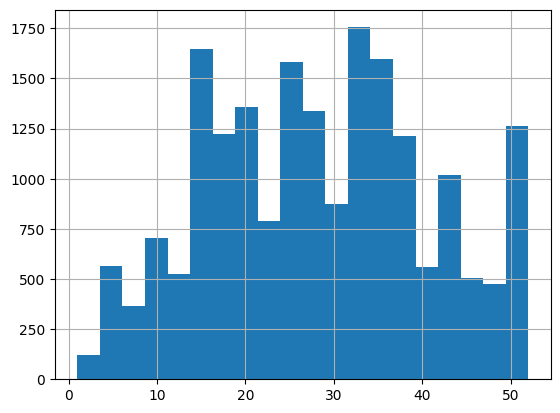

In [ ]:
#@title Explore Histograms for Housing Data { run: "auto" }
housing_variable = 'population' #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value','bedrooms_to_rooms_ratio','people_per_house', 'people_per_bedroom', 'rooms_per_people']
Number_of_Bins = 20 #@param {type:"integer"}

housing_df[housing_variable].hist(bins = Number_of_Bins)

In [ ]:
#@title Display Correlation Matrix
housing_df.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_to_rooms_ratio,people_per_house,people_per_bedroom,rooms_per_people
longitude,1.000000,-0.924092,-0.103793,0.045081,0.069871,0.101488,0.056784,-0.009157,-0.046187,0.095936,0.002209,0.000714,-0.078941
latitude,-0.924092,1.000000,0.007494,-0.033861,-0.067940,-0.113535,-0.073439,-0.077999,-0.148637,-0.126991,0.002066,0.000206,0.156097
housing_median_age,-0.103793,0.007494,1.000000,-0.371274,-0.327308,-0.294553,-0.309135,-0.194259,0.068595,0.155421,0.014940,0.016845,-0.133239
total_rooms,0.045081,-0.033861,-0.371274,1.000000,0.934147,0.859717,0.921620,0.223865,0.142188,-0.190481,-0.024394,-0.024249,0.133823
total_bedrooms,0.069871,-0.067940,-0.327308,0.934147,1.000000,0.879176,0.979144,0.021903,0.074672,0.073159,-0.028122,-0.028786,0.065658
population,0.101488,-0.113535,-0.294553,0.859717,0.879176,1.000000,0.908940,0.042522,0.011153,0.026849,0.070333,0.065016,-0.138372
households,0.056784,-0.073439,-0.309135,0.921620,0.979144,0.908940,1.000000,0.046430,0.093890,0.054344,-0.027143,-0.024487,-0.024647
median_income,-0.009157,-0.077999,-0.194259,0.223865,0.021903,0.042522,0.046430,1.000000,0.642733,-0.626753,0.026322,0.032460,0.216620
median_house_value,-0.046187,-0.148637,0.068595,0.142188,0.074672,0.011153,0.093890,0.642733,1.000000,-0.215950,-0.021388,-0.016908,0.162034
bedrooms_to_rooms_ratio,0.095936,-0.126991,0.155421,-0.190481,0.073159,0.026849,0.054344,-0.626753,-0.215950,1.000000,0.003010,-0.000329,-0.268611


Text(0.5, 1.0, 'Heatmap of correlation matrix for Cal Housing Data')

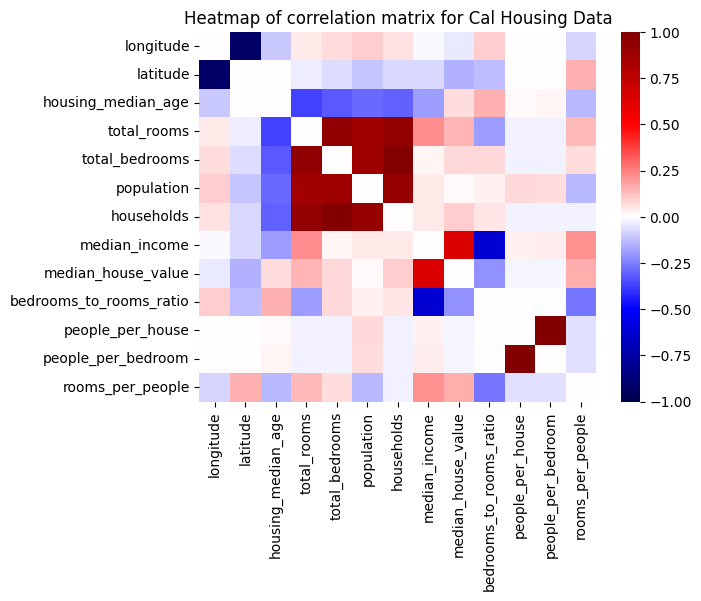

In [ ]:
#@title Heatmap of correlation matrix for Cal Housing Data
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# filter columns
#corr = housing_df[['housing_median_age', 'total_bedrooms','total_rooms','bedrooms_to_rooms_ratio','population', 'households', 'median_income', 'median_house_value']].corr()

#no filter
corr = housing_df.corr(numeric_only = True)

#suppress the diagonal entries
for i in corr.index:
  corr.loc[i,i] = 0


# plotting correlation heatmap
ax1 = sb.heatmap(corr, cmap="seismic",vmin = -1 ,vmax = 1)

ax1.set_title('Heatmap of correlation matrix for Cal Housing Data')

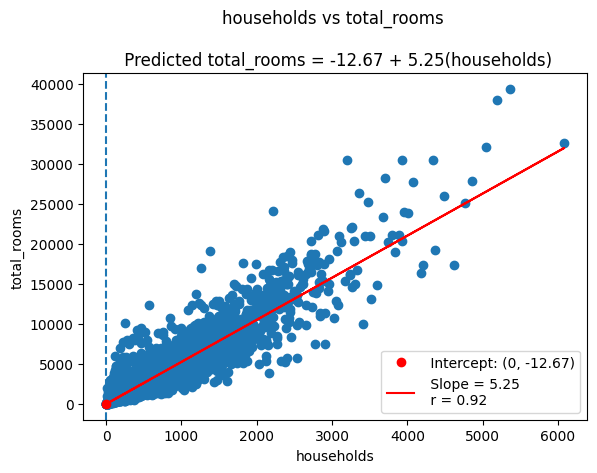

In [ ]:
#@title Scatterplots and regression lines { vertical-output: true }
x = "households" #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value','bedrooms_to_rooms_ratio','people_per_house', 'people_per_bedroom', 'rooms_per_people']
y = "total_rooms" #@param ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value',  'bedrooms_to_rooms_ratio','people_per_house', 'people_per_bedroom', 'rooms_per_people']
plot_intercept = True #@param {type:"boolean"}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np



# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(6.5, 4.5))
ax1.scatter(housing_df[x], housing_df[y])


# Get the regression line from SciPy
slope, intercept, r_value, p_value, std_err = linregress(housing_df[x], housing_df[y])

if plot_intercept:
  ax1.axvline(x=0, linestyle='dashed')
  ax1.plot(0, intercept, 'o', color='red', label=f' Intercept: (0, {np.round(intercept,2)})')

# Add the regression line to the scatterplot
ax1.plot(housing_df[x], slope*housing_df[x] + intercept, 'r-', label = f' Slope = {np.round(slope, 2)} \n r = {np.round(r_value,2)}')
ax1.set_title(f'{x} vs {y} \n \n Predicted {y} = {np.round(intercept,2)} + {np.round(slope,2)}({x})')
# Add text below the plot that describes the linear model
#ax1.text(0.5, -0.5, , horizontalalignment='center', verticalalignment='bottom')

ax1.legend(loc='best')
ax1.set_xlabel(x)
ax1.set_ylabel(y)
# Show the plots
plt.show()

In [ ]:
#@title import data into wnba_df dataframe
wnba_df = pd.read_csv('https://raw.githubusercontent.com/campbellmath001/datasets/main/WNBA_2016-2017_Player_Stats.csv')
wnba_df = wnba_df.dropna(axis=0, how='any')

In [ ]:
wnba_df.describe()

,Height,Weight,BMI,birth_day,birth_year,Age,Games Played,MIN,FGM,FGA,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,184.612676,78.978873,23.091214,15.387324,1989.549296,27.112676,24.429577,500.105634,74.401408,168.704225,...,22.063380,61.591549,83.654930,44.514085,17.725352,9.781690,32.288732,203.169014,1.140845,0.007042
std,8.698128,10.996110,2.073691,9.023098,3.706574,3.667180,7.075477,289.373393,55.980754,117.165809,...,21.519648,49.669854,68.200585,41.490790,13.413312,12.537669,21.447141,153.032559,2.909002,0.083918
min,165.000000,55.000000,18.390675,1.000000,1980.000000,21.000000,2.000000,12.000000,1.000000,3.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
25%,175.750000,71.500000,21.785876,7.000000,1987.000000,24.000000,22.000000,242.250000,27.000000,69.000000,...,7.000000,26.000000,34.250000,11.250000,7.000000,2.000000,14.000000,77.250000,0.000000,0.000000
50%,185.000000,79.000000,22.873314,15.500000,1990.000000,27.000000,27.500000,506.000000,69.000000,152.500000,...,13.000000,50.000000,62.500000,34.000000,15.000000,5.000000,28.000000,181.000000,0.000000,0.000000
75%,191.000000,86.000000,24.180715,23.000000,1992.000000,30.000000,29.000000,752.500000,105.000000,244.750000,...,31.000000,84.000000,116.500000,66.750000,27.500000,12.000000,48.000000,277.750000,1.000000,0.000000
max,206.000000,113.000000,31.555880,31.000000,1995.000000,36.000000,32.000000,1018.000000,227.000000,509.000000,...,113.000000,226.000000,334.000000,206.000000,63.000000,64.000000,87.000000,584.000000,17.000000,1.000000


<Axes: >

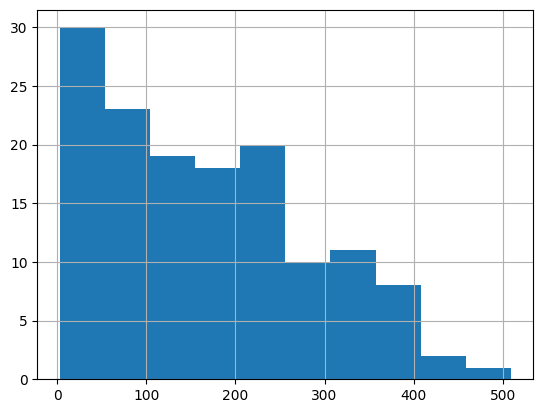

In [ ]:
#@title Explore Histograms { run: "auto", vertical-output: true }
wnba_variable = "FGA" #@param ['Height', 'Weight', 'BMI','birth_day', 'birth_year', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TO', 'PTS', 'DD2', 'TD3']
Number_of_Bins = 10 #@param {type:"integer"}
wnba_df[wnba_variable].hist(bins = Number_of_Bins)

Text(0.5, 1.0, 'Heatmap of correlation matrix for WNBA data')

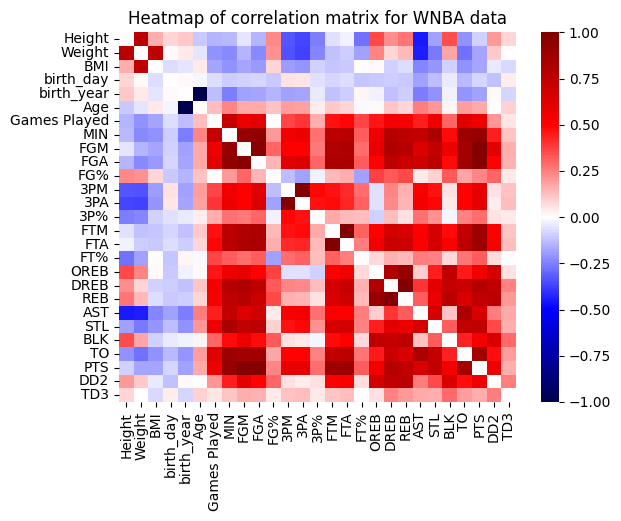

In [ ]:
#@title Heatmap of correlation matrix for WNBA data
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# filter columns here by passing a list of variable names wnba_df[['col1', 'col2']]
corr = wnba_df.corr(numeric_only = True)

#suppress the diagonal entries
for i in corr.index:
  corr.loc[i,i] = 0


# plotting correlation heatmap
ax1 = sb.heatmap(corr, cmap="seismic",vmin = -1 ,vmax = 1, yticklabels = True)

ax1.set_title('Heatmap of correlation matrix for WNBA data')

*   MIN = Minutes Played
*FGM = Field Goals Made
*FGA = Field Goals Attempts
*FG% = Field Goals %
*3PM = 3Points Made
*3PA = 3Points Attempts
*3P% = 3Points %
*FTM = Free Throws made
*FTA = Free Throws Attempts
*FT% = Free Throws %
*OREB = Offensive Rebounds
*DREB = Defensive Rebounds
*REB = Total Rebounds
*AST = Assists
*STL = Steals
*BLK = Blocks
*TO = Turnovers
*PTS = Total points
*DD2 = Double doubles
*TD3 = Triple doubles

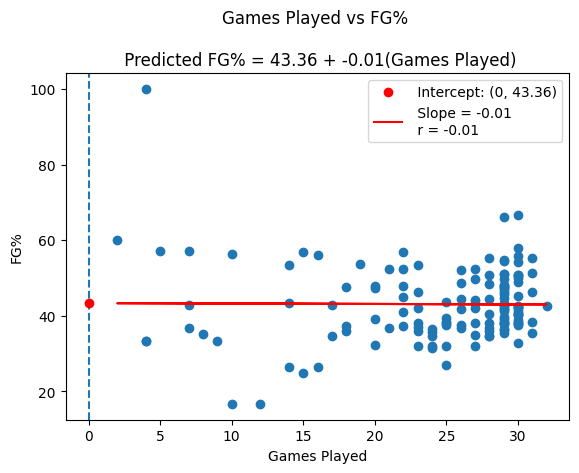

In [ ]:
#@title Scatterplots and regression lines for WNBA data { vertical-output: true }
x = "Games Played" #@param ['Height', 'Weight', 'BMI','birth_day', 'birth_year', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TO', 'PTS', 'DD2', 'TD3']
y = "FG%" #@param ['Height', 'Weight', 'BMI','birth_day', 'birth_year', 'Age','Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TO', 'PTS', 'DD2', 'TD3']

plot_intercept = True #@param {type:"boolean"}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np



# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(6.5, 4.5))
ax1.scatter(wnba_df[x], wnba_df[y])


# Get the regression line from SciPy
slope, intercept, r_value, p_value, std_err = linregress(wnba_df[x], wnba_df[y])

if plot_intercept:
  ax1.axvline(x=0, linestyle='dashed')
  ax1.plot(0, intercept, 'o', color='red', label=f' Intercept: (0, {np.round(intercept,2)})')

# Add the regression line to the scatterplot
ax1.plot(wnba_df[x], slope*wnba_df[x] + intercept, 'r-', label = f' Slope = {np.round(slope, 2)} \n r = {np.round(r_value,2)}')
ax1.set_title(f'{x} vs {y} \n \n Predicted {y} = {np.round(intercept,2)} + {np.round(slope,2)}({x})')


ax1.legend(loc='best')
ax1.set_xlabel(x)
ax1.set_ylabel(y)
# Show the plots
plt.show()

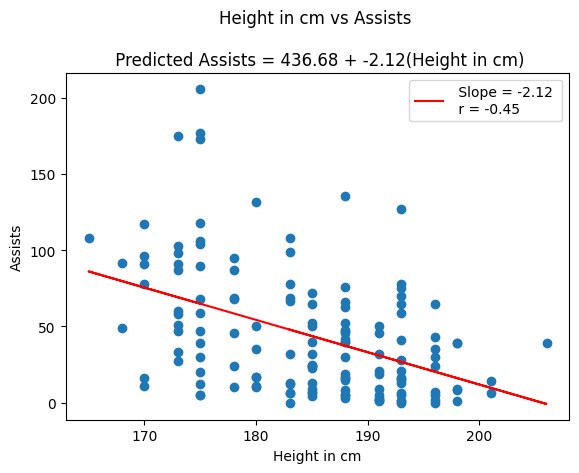

In [ ]:
#@title Scatterplots and regression lines for WNBA data { vertical-output: true }
x = "Height" #@param ['Height', 'Weight', 'BMI','birth_day', 'birth_year', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TO', 'PTS', 'DD2', 'TD3']
y = "AST" #@param ['Height', 'Weight', 'BMI','birth_day', 'birth_year', 'Age','Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '3PM', '3PA','3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK','TO', 'PTS', 'DD2', 'TD3']
x_text = "Height in cm" #@param {type:"string"}
y_text = "Assists" #@param {type:"string"}
plot_intercept = False #@param {type:"boolean"}

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np



# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(6.5, 4.5))
ax1.scatter(wnba_df[x], wnba_df[y])


# Get the regression line from SciPy
slope, intercept, r_value, p_value, std_err = linregress(wnba_df[x], wnba_df[y])

if plot_intercept:
  ax1.axvline(x=0, linestyle='dashed')
  ax1.plot(0, intercept, 'o', color='red', label=f' Intercept: (0, {np.round(intercept,2)})')

# Add the regression line to the scatterplot
ax1.plot(wnba_df[x], slope*wnba_df[x] + intercept, 'r-', label = f' Slope = {np.round(slope, 2)} \n r = {np.round(r_value,2)}')
ax1.set_title(f'{x_text} vs {y_text} \n \n Predicted {y_text} = {np.round(intercept,2)} + {np.round(slope,2)}({x_text})')


ax1.legend(loc='best')
ax1.set_xlabel(x_text)
ax1.set_ylabel(y_text)
# Show the plots
plt.show()